In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Explaining the Pima Indians Diabetes Dataset

The Pima Indians Diabetes Dataset is a collection of health-related data from the Pima Native American tribe in Arizona, USA. It includes info like age, pregnancies, BMI, blood pressure, and glucose levels. People use this data to predict diabetes. 📊

As a researcher, I find this dataset interesting because it helps us understand why people get diabetes. Diabetes is a big health problem, so studying this data can help us prevent it. 🤓

But there's a challenge: there are more cases of diabetes than non-diabetes in the data. This makes it tricky to analyze accurately. 😬

Even with challenges, this dataset gives us valuable insights into diabetes risk factors. By studying it closely, we can find ways to help people prevent diabetes, especially in communities like the Pima Native Americans. 🧐

# Let's begin the challenge by importing a bunch of libraries 📊

These imports are like my trusty tools for machine learning adventures:

- `LabelEncoder` and `StandardScaler` help me get the data ready for analysis. 🛠️
- `train_test_split` divides the data so I can train and test my models. 📊
- `SMOTE` balances out imbalanced data, making my predictions more accurate. ⚖️
- Metrics like accuracy, confusion matrix, and F1 score show me how well my models are doing. 📏
- `Pipeline` lets me set up a workflow for preprocessing and modeling steps. 🔄
- Libraries like `pandas`, `numpy`, `matplotlib`, and `seaborn` help me wrangle and visualize data. 📊
- `GridSearchCV` helps me fine-tune my models for best performance. 🔍
- Algorithms like Logistic Regression, Decision Tree, SVM, KNN, and Random Forest are my go-to choices for classification tasks. 🤖


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, classification_report
from tqdm import tqdm
from sklearn.pipeline import Pipeline

I'm putting on my 'ignore hat' for warnings! 🤠

- `warnings.simplefilter(action='ignore', category=FutureWarning)` helps me ignore future warnings, so I can focus on the present. 🚫⏰
- `warnings.filterwarnings("ignore", category=DeprecationWarning)` and `warnings.filterwarnings("ignore", category=FutureWarning)` help me brush off deprecation and future warnings, keeping my workspace clean and focused. 🧹


In [4]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

Let's dive in! 😊

- I'm getting the data from a CSV file called "diabetes.csv" from the repo. Then, I'm storing it in a DataFrame named `df`. 📊


In [6]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")




Let's take a peek! 👀

- I would like to check out the dataset a bit more to understand what are the things that I can do with it later on. Lets use some basic pandas commands to analyse the dataset thoroughly!


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Looks like there are no Nan/Null values! 👀

- It is important to note that most ML models are incapable of handling Nan or empty values so we need to either prune them or replace them. But in this case, there is no need for it since the dataset is already well curated.

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Ok lets address the elephant in the room! 
# The Data distributions 😎

- Lets begin the data analysis by checking the data distribution on the Outcome column first.

- Outcome column contains the value which determins whether a person is diagnosed with diabetes or not

- We can use matplotlib to prepare a nice pie chart for us to display the information in a digestable way 😋

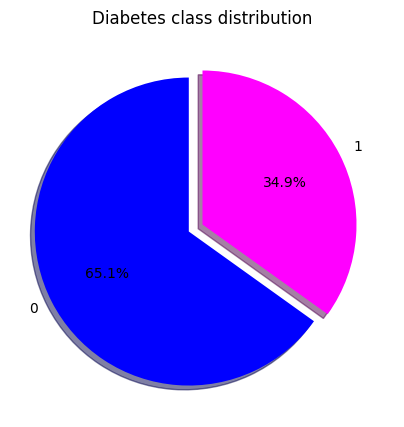

In [12]:
labels =df['Outcome'].value_counts(sort = True).index
sizes = df['Outcome'].value_counts(sort = True)

colors = ["blue","magenta"]
explode = (0.1,0)
 
plt.figure(figsize=(5,5)) #Plot size
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Diabetes class distribution')
plt.show()

 - Hmm Looks like the distribution is not exactly 50/50 😕

 - However this is good enough for us to work with and I can use some over sampling techniques to make it work

 - These type of class imbalances are common in real life scenarios and it is in the hands of the ML engineers like me to tackle these issues and make models work in par with our expectations. 😍

In [13]:
X = df.drop("Outcome",axis = 1)
y = df.Outcome

# Let's dive a bit deeper! 🌊🌊 

In [14]:
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


I would like to check the distribution of individual columns. I can do it with the help of ```histograms``` 📐📐

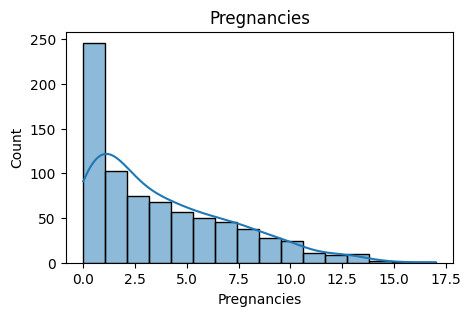

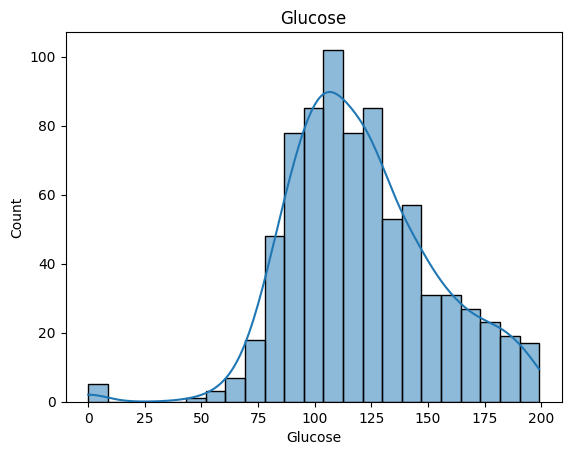

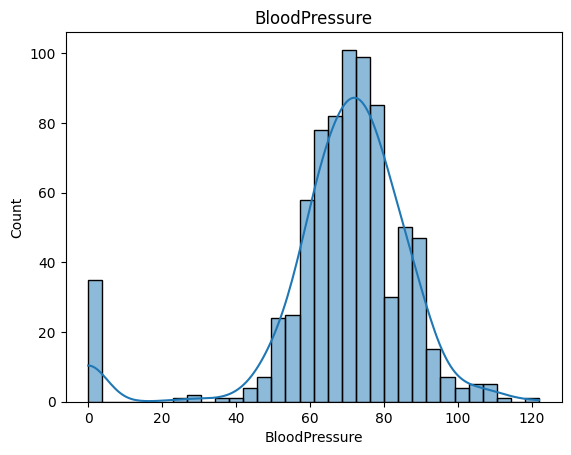

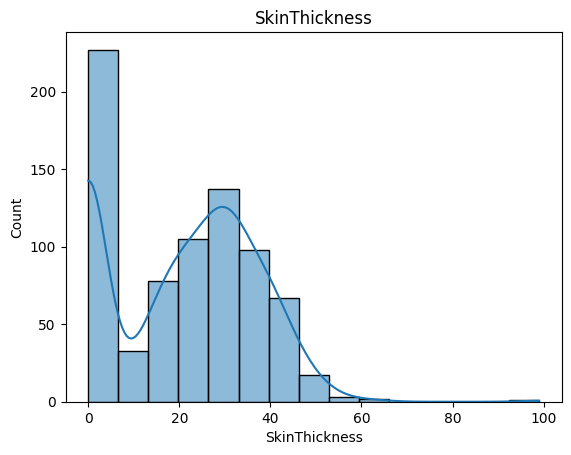

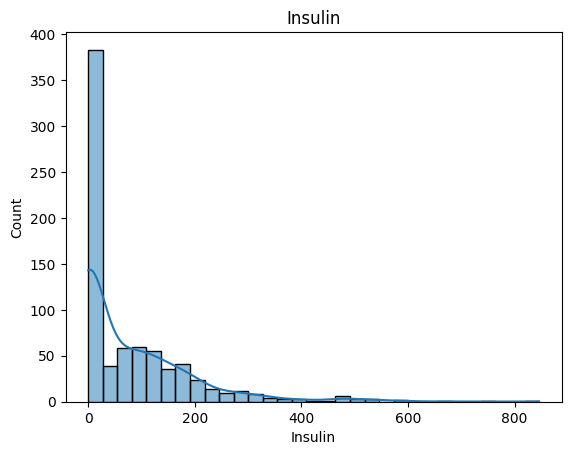

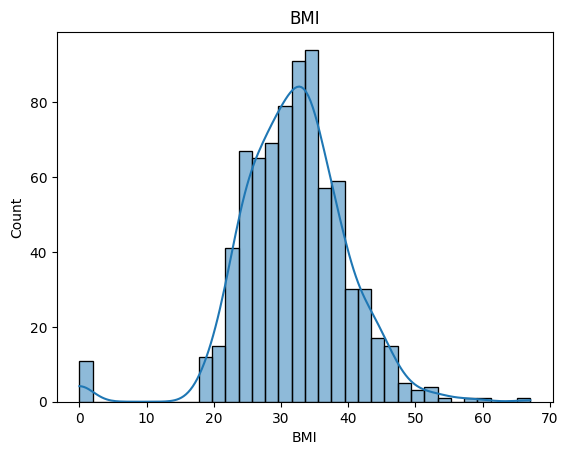

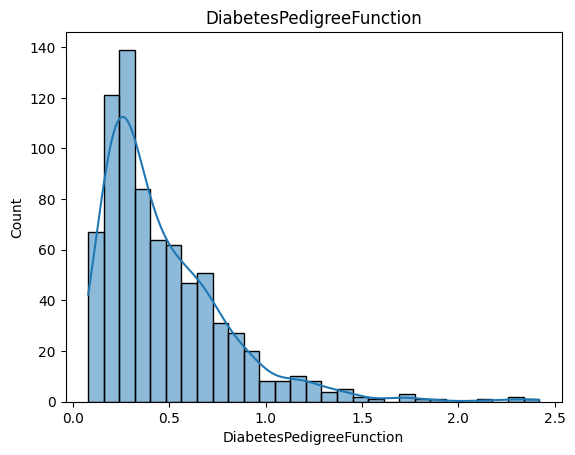

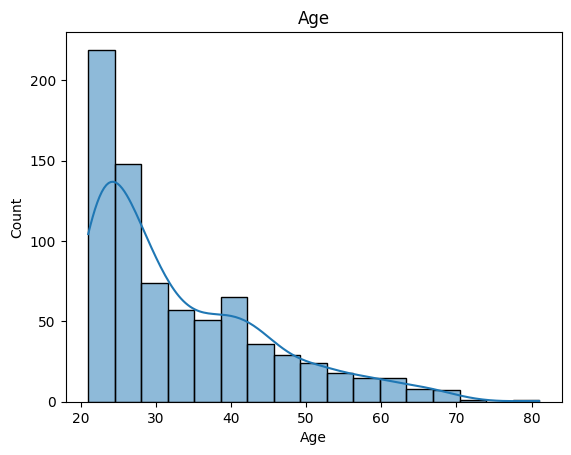

In [15]:
fig, ax = plt.subplots(figsize=(5, 3))
for col in X.columns:
    sns.histplot(data=df, x=col, kde = True)
    plt.title(f"{col}")
    plt.show()

Looks like there are plenty of zeros in the dataset! Is it a bad thing? 😟 😟 

- Well zeros are also values.
- We need to know the context/reason for why zeros are in the dataset.
- Some times zeros indicates a filler or a value used to represent a lack of data
- But in this case, it is not because of it.
- To resolve this I made a well explained post with the reasons behind the zeros in the dataset, which I highly recommend the people who are watching this to read 😙😙

### Link: [DEBUNKING issues regarding the 'zeros' in the dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/discussion/395213)

I want to see the distribution of values on each columns with respect to the Outcome variable

- I can do that by simply plotting the histogram in the form of a kernet density plot for both classes

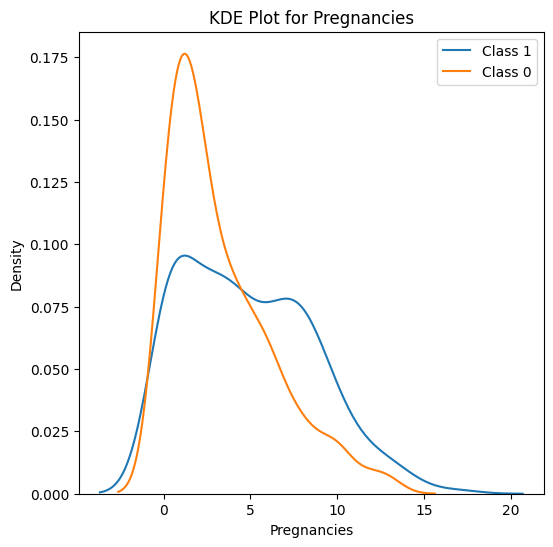

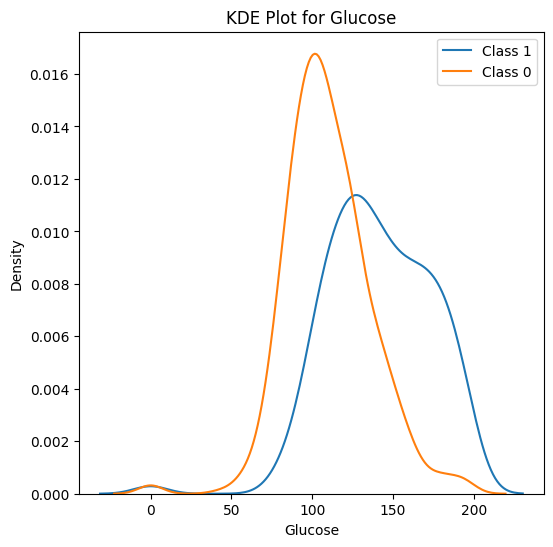

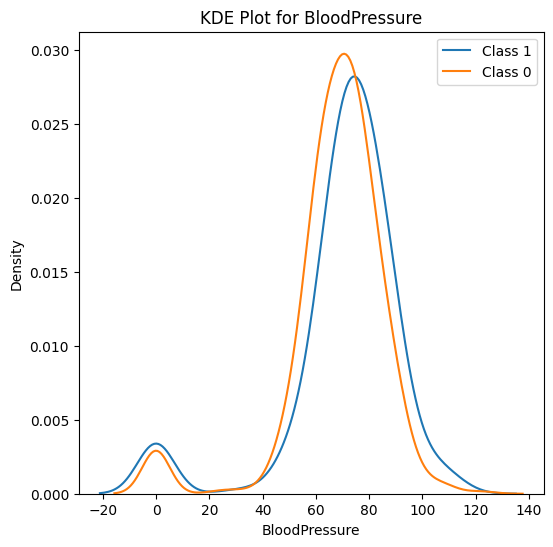

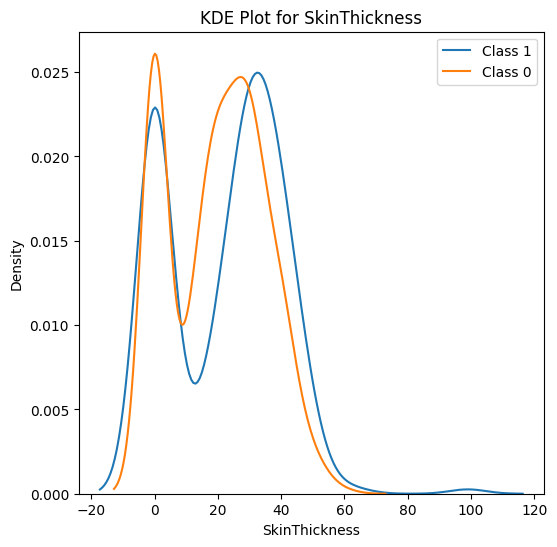

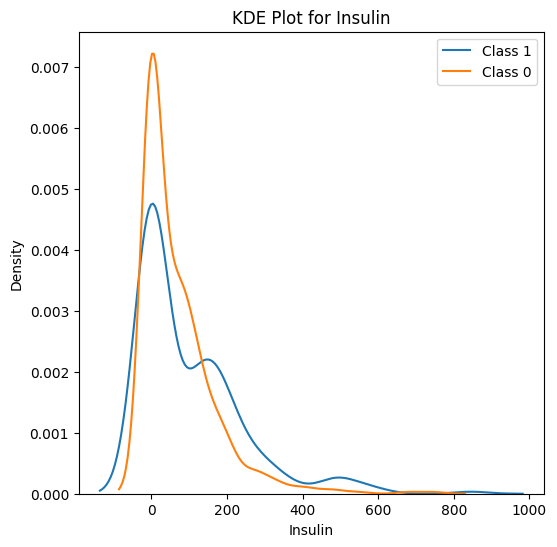

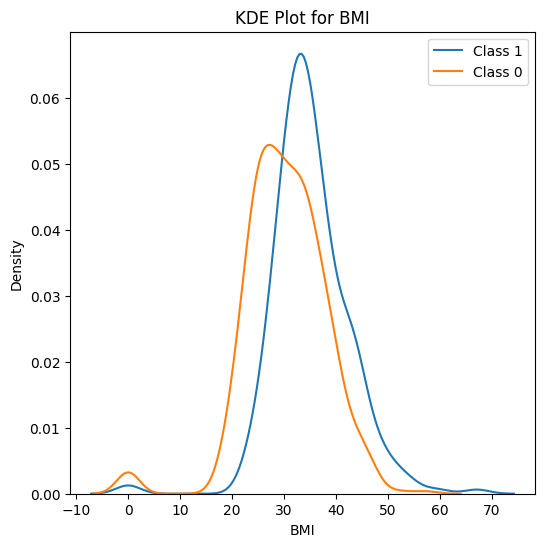

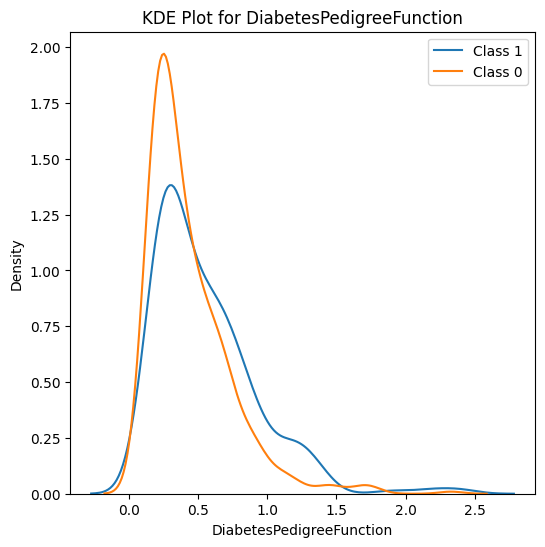

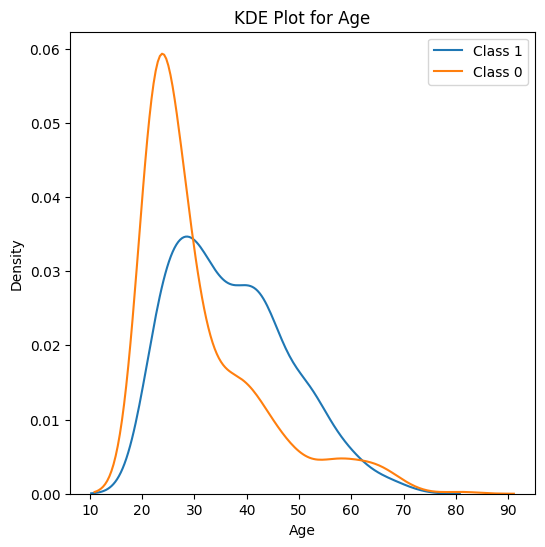

In [16]:
class_list = y.unique()

for col in X.columns:
    fig, ax = plt.subplots(figsize=(6, 6))
    for i, c in enumerate(class_list):
        sns.kdeplot(data=df[df["Outcome"] == c][col], label=f"Class {c}")

    plt.title(f"KDE Plot for {col}")
    plt.legend()
    plt.show()

These minute vairations in the distribution is crucial  inorder for our models to perform well and generalize the input data 📼

### Bring the heat with the HeatMap 🔥🔥

- A heatmap is a graphical representation of data where values in a matrix are represented as colors. 
- In a heatmap, darker colors typically represent higher values, while lighter colors represent lower values. 
- Reading a heatmap involves understanding the color scale and identifying patterns or relationships between variables encoded in the heatmap. 
- It's like deciphering a colorful map of insights! 🗺️🔍

<Axes: >

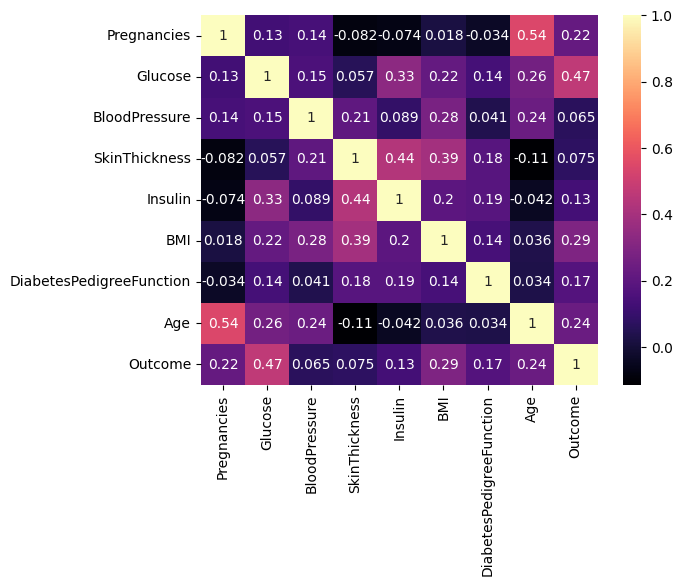

In [17]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap='magma')

## I feel like its enough data analysis. Lets go for the main course!

Train Test Split! 🚂🛤️

Test-train split is a method used to divide a dataset into two subsets:

- one for training a machine learning model
- the other for testing its performance.

By separating data this way, we can evaluate the model's ability to generalize to new, unseen data. 

It's like setting aside a portion of our data for examination after our model has been trained, ensuring its reliability on unfamiliar territory! 👨‍🔬🔍


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

Let's talk about scaling! 📏

- Scaler, like StandardScaler, is a preprocessing technique used to standardize features by removing the mean and scaling to unit variance. 
- This ensures that each feature contributes equally to the analysis and prevents features with larger scales from dominating those with smaller scales. 
- StandardScaler transforms the data to have a mean of 0 and a standard deviation of 1, making it easier for machine learning algorithms to converge and improving model performance. 
- It's like putting all our features on the same playing field before letting our model make its predictions! 🎢📊


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print(X_train)
print(X_test)

[[ 0.93138344  2.0179454   0.78066953 ...  0.43148259 -0.37477883
   0.63212912]
 [ 0.63260632 -1.14861888  0.46538785 ... -0.1198324  -0.29416766
   0.71699246]
 [-0.56250219 -0.47692343 -0.2702694  ... -0.20958135  2.74517192
   0.03808578]
 ...
 [-0.86127931 -0.76479291  0.04501228 ...  0.76483585 -0.78380586
  -0.30136756]
 [ 0.63260632  2.20985838  1.2010451  ...  0.43148259 -0.60466993
   2.75371249]
 [ 0.03505207  0.73852549 -0.58555107 ... -0.33779414 -0.57779954
   0.29267578]]
[[-0.26372506  0.29072852  0.46538785 ... -0.47882821 -0.47031799
   0.03808578]
 [ 0.03505207 -0.38096693 -0.2702694  ...  0.34173364  1.26730051
  -0.6408209 ]
 [ 2.12649194  0.70653999  1.30613899 ...  0.57251666 -0.6763243
   1.48076247]
 ...
 [ 2.7240462  -0.47692343  0.15010617 ...  0.57251666 -0.90322981
   0.97158246]
 [-0.56250219  1.18632246  1.09595121 ... -0.06854728  0.96874063
   2.75371249]
 [-0.86127931 -0.18905395  0.04501228 ...  0.31609108  0.14471537
  -0.13164089]]


Let's dive into SMOTE! 🔄

- SMOTE, which stands for Synthetic Minority Over-sampling Technique, is a method used to address class imbalance in datasets. 
- It works by creating synthetic samples of the minority class to balance out the class distribution. 
- This helps prevent bias towards the majority class and improves the performance of machine learning models, especially in scenarios where the minority class is underrepresented. 
- It's like adding more examples of the underrepresented class to ensure our model learns to recognize it effectively! 🤖📊


In [21]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

## Let's explore pipelines! 🚀

 - Pipelines are a powerful tool in machine learning workflows for chaining together multiple data preprocessing and modeling steps. 
 - They allow us to streamline the process by automating tasks such as feature scaling, feature selection, and model training. 
 - With pipelines, we can ensure consistency in our analysis and easily reproduce our results. 
 - It's like having a well-organized assembly line for transforming raw data into predictive models! 🛠️🔗


In [22]:
logistic_regression_pipeline = Pipeline([('clf', LogisticRegression())])
decision_tree_pipeline = Pipeline([('clf', DecisionTreeClassifier())])
svc_pipeline = Pipeline([('clf', SVC())])
knn_pipeline = Pipeline([('clf', KNeighborsClassifier())])
random_forest_pipeline = Pipeline([('clf',RandomForestClassifier())])

## Parameter grids! 🎛️

Parameter grids are a way to systematically explore different combinations of hyperparameters for machine learning algorithms. 
- By defining a grid of parameter values, we can efficiently search for the optimal combination that yields the best model performance. 
- Parameter grids help us fine-tune our models and maximize their predictive accuracy. 
- It's like searching for the perfect combination lock code to unlock the full potential of our algorithms! 🔍🔒

For this assignment I'm going to use the parameters grids that I constructed a while ago and use them to find the best parameters.

To make it more feasible, I'm restricting myself to train only 5 models for this session. Ofcourse there are basically hundreds of models exists and trying all of them in one-go might not be a great idea. 😊

In [23]:
decision_tree_param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__splitter': ['best', 'random'],
    'clf__max_depth': [50,100,200,500,750,1000],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4, 8],
    'clf__max_features': ['sqrt', 'log2']
}

knn_param_grid = {
    'clf__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2],
}

logistic_param_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__fit_intercept': [True, False],
    'clf__solver': ['liblinear', 'saga'],
    'clf__multi_class': ['ovr', 'multinomial'],
}

svc_param_grid = {
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'clf__degree': [2, 3, 4],
    'clf__gamma': ['scale', 'auto'],
}

random_forest_param_grid = {
    'clf__n_estimators': [10, 50, 100, 150, 200, 250, 500],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [10, 20, 30, 40, 50, 75, 100],
    'clf__max_features': ['sqrt', 'log2'],
}


In [24]:
pipelines = [
    (logistic_regression_pipeline, logistic_param_grid),
    (decision_tree_pipeline, decision_tree_param_grid),
    (svc_pipeline, svc_param_grid),
    (knn_pipeline, knn_param_grid),
    (random_forest_pipeline, random_forest_param_grid)
]

To store our best parameter list

In [25]:
best_params = {}

# Let's go ahead and make the CPU suffer!

In [26]:
for pipeline, param_grid in tqdm(pipelines, desc="Fitting Pipelines"):

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[type(pipeline.named_steps['clf']).__name__] = grid_search.best_params_

for model, params in best_params.items():
    print(f"{model}: {params}")

Fitting Pipelines:   0%|          | 0/5 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    mul

LogisticRegression: {'clf__C': 0.1, 'clf__fit_intercept': True, 'clf__multi_class': 'ovr', 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
DecisionTreeClassifier: {'clf__criterion': 'gini', 'clf__max_depth': 500, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__splitter': 'best'}
SVC: {'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
KNeighborsClassifier: {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'distance'}
RandomForestClassifier: {'clf__criterion': 'gini', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__n_estimators': 150}


## How does this code work?! 🛠️

- We're using a loop to iterate over each pipeline along with its corresponding parameter grid. The tqdm() function provides a progress bar for visual feedback.
- Inside the loop, we're performing grid search cross-validation (GridSearchCV) for each pipeline and parameter grid combination. This helps us find the best hyperparameters for each model.
- The best_params dictionary is updated with the best parameters found for each model.
- Finally, we print out the best parameters for each model to see which combination performed the best.
- It's like systematically testing different configurations to find the optimal setup for our machine learning models! 🔍🔧


In [27]:
print(best_params)

{'LogisticRegression': {'clf__C': 0.1, 'clf__fit_intercept': True, 'clf__multi_class': 'ovr', 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}, 'DecisionTreeClassifier': {'clf__criterion': 'gini', 'clf__max_depth': 500, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__splitter': 'best'}, 'SVC': {'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}, 'KNeighborsClassifier': {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'distance'}, 'RandomForestClassifier': {'clf__criterion': 'gini', 'clf__max_depth': 75, 'clf__max_features': 'sqrt', 'clf__n_estimators': 150}}


Ok these are our best model parameters. Im going to use them to train our main models and compare them all at the end!

## Here's a general overview of the process:

- We start by defining the hyperparameters for the model.
- Then, we create an instance of the model (e.g., LogisticRegression) with the specified hyperparameters and fit it to the training data using fit().
- Once the model is trained, we make predictions on the test data using predict().
- We evaluate the performance of the model using metrics like accuracy_score and f1_score to measure how well the model predicts the target variable.
- Additionally, we visualize the performance using a confusion matrix, which shows the true positives, true negatives, false positives, and false negatives.
- Finally, we print out a classification report, which provides a summary of key metrics like precision, recall, and F1 score for each class.
- This process allows us to assess the model's performance and understand how well it generalizes to unseen data, helping us make informed decisions about its suitability for real-world applications. 📊🔍

P.S: I'm not in a mood to modularize this process into a single code so for now, Im going to run each model individually. Next time around I will make a unique function to perform this job, hassle-free 😏😏

231
Test Accuracy: 0.7662337662337663
Logistic Regression Test F1 Score: 0.6785714285714286


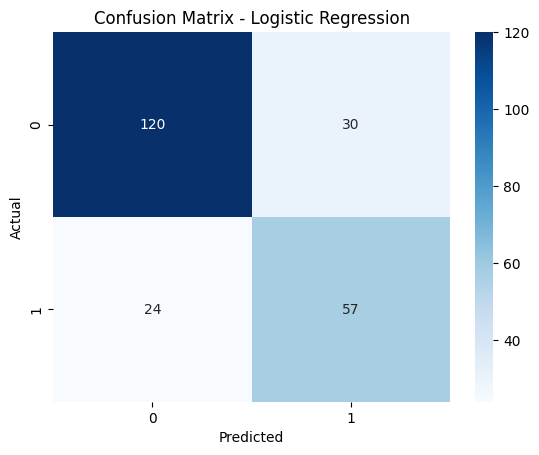

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       150
           1       0.66      0.70      0.68        81

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



In [28]:
logistic_params = {'C': 0.1, 'fit_intercept': True, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
logistic_model = LogisticRegression(**logistic_params)
logistic_model.fit(X_train, y_train)
logistic_test_pred= logistic_model.predict(X_test)
print(len(logistic_test_pred))
logistic_accuracy = accuracy_score(y_test, logistic_test_pred)
print(f"Test Accuracy: {logistic_accuracy}")

logistic_f1score = f1_score(y_test, logistic_test_pred)
print(f"Logistic Regression Test F1 Score: {logistic_f1score}")


logistic_cm = confusion_matrix(y_test, logistic_test_pred)
sns.heatmap(logistic_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

logistic_classification_report = classification_report(y_test, logistic_test_pred)
print("Classification Report - Logistic Regression:")
print(logistic_classification_report)

Test Accuracy - Decision Tree Classifier: 0.7186147186147186
F1 Score - Decision Tree Classifier: 0.6153846153846153


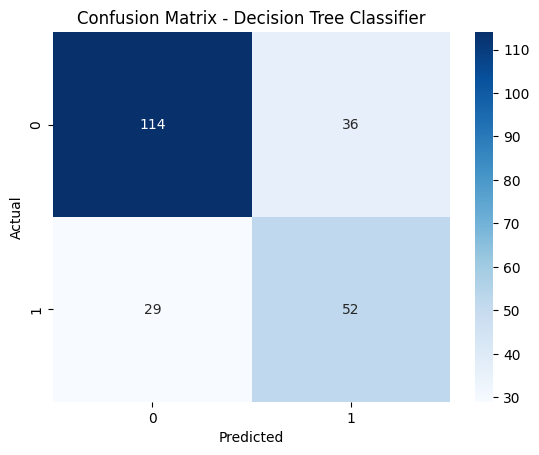

Classification Report - Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       150
           1       0.59      0.64      0.62        81

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



In [29]:
dt_params = {'criterion': 'entropy', 'max_depth': 750, 'max_features': 'log2', 
             'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
dt_model = DecisionTreeClassifier(**dt_params)
dt_model.fit(X_train, y_train)
dt_test_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_test_pred)
print(f"Test Accuracy - Decision Tree Classifier: {dt_accuracy}")

dt_f1score = f1_score(y_test, dt_test_pred)
print(f"F1 Score - Decision Tree Classifier: {dt_f1score}")

dt_cm = confusion_matrix(y_test, dt_test_pred)
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

dt_classification_report = classification_report(y_test, dt_test_pred)
print("Classification Report - Decision Tree Classifier:")
print(dt_classification_report)

Test Accuracy - Support Vector Classifier: 0.7445887445887446
F1 Score - Support Vector Classifier: 0.6589595375722543


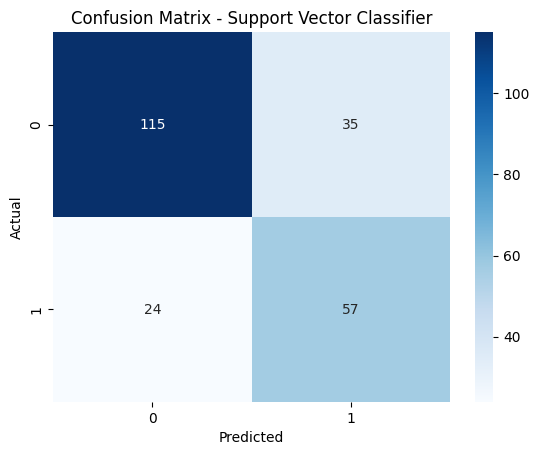

Classification Report - Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       150
           1       0.62      0.70      0.66        81

    accuracy                           0.74       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.75      0.74      0.75       231



In [30]:
svc_params = {'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
svc_model = SVC(**svc_params)
svc_model.fit(X_train, y_train)
svc_test_pred = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_test_pred)
print(f"Test Accuracy - Support Vector Classifier: {svc_accuracy}")

svc_f1score = f1_score(y_test, svc_test_pred)
print(f"F1 Score - Support Vector Classifier: {svc_f1score}")

svc_cm = confusion_matrix(y_test, svc_test_pred)
sns.heatmap(svc_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.show()

svc_classification_report = classification_report(y_test, svc_test_pred)
print("Classification Report - Support Vector Classifier:")
print(svc_classification_report)

Test Accuracy - K Neighbors Classifier: 0.683982683982684
F1 Score - K Neighbors Classifier: 0.5828571428571429


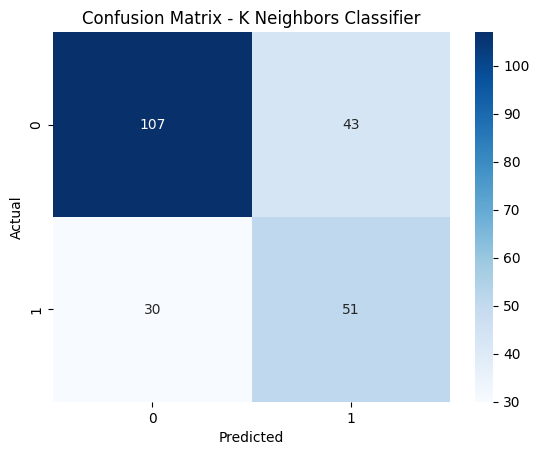

Classification Report - K Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       150
           1       0.54      0.63      0.58        81

    accuracy                           0.68       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.68      0.69       231



In [31]:
knn_params = {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
knn_model = KNeighborsClassifier(**knn_params)
knn_model.fit(X_train, y_train)
knn_test_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_test_pred)
print(f"Test Accuracy - K Neighbors Classifier: {knn_accuracy}")

knn_f1score = f1_score(y_test, knn_test_pred)
print(f"F1 Score - K Neighbors Classifier: {knn_f1score}")

knn_cm = confusion_matrix(y_test, knn_test_pred)
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K Neighbors Classifier')
plt.show()

knn_classification_report = classification_report(y_test, knn_test_pred)
print("Classification Report - K Neighbors Classifier:")
print(knn_classification_report)

Test Accuracy - Random Forest Classifier: 0.7445887445887446
F1 Score - Random Forest Classifier: 0.6335403726708074


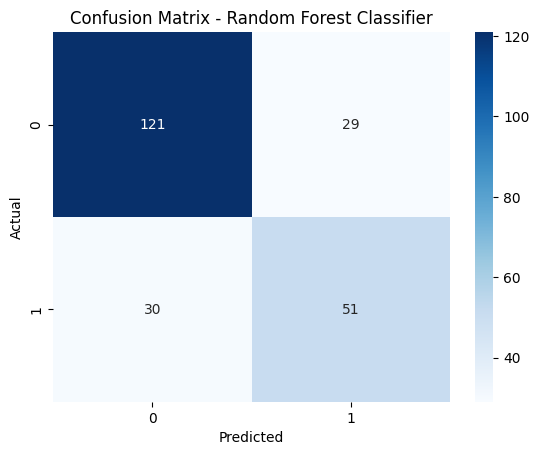

Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       150
           1       0.64      0.63      0.63        81

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [32]:
rf_params = {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 150}
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)
rf_test_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_test_pred)
print(f"Test Accuracy - Random Forest Classifier: {rf_accuracy}")

rf_f1score = f1_score(y_test, rf_test_pred)
print(f"F1 Score - Random Forest Classifier: {rf_f1score}")

rf_cm = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

rf_classification_report = classification_report(y_test, rf_test_pred)
print("Classification Report - Random Forest Classifier:")
print(rf_classification_report)

## Woah, thats a lot of code lets summarize all of these by making a nice little table to see the model performance by ourselves. 

In [33]:
model_performances = []

model_performances.append({'Model': 'Logistic Regression',
                           'Accuracy': logistic_accuracy,
                           'F1 Score': logistic_f1score})

model_performances.append({'Model': 'Decision Tree Classifier',
                           'Accuracy': dt_accuracy,
                           'F1 Score': dt_f1score})

model_performances.append({'Model': 'Support Vector Classifier',
                           'Accuracy': svc_accuracy,
                           'F1 Score': svc_f1score})

model_performances.append({'Model': 'K Neighbors Classifier',
                           'Accuracy': knn_accuracy,
                           'F1 Score': knn_f1score})

model_performances.append({'Model': 'Random Forest Classifier',
                           'Accuracy': rf_accuracy,
                           'F1 Score': rf_f1score})

performance_metrics = pd.DataFrame(model_performances)
performance_metrics.head()

,Model,Accuracy,F1 Score
0,Logistic Regression,0.766234,0.678571
1,Decision Tree Classifier,0.718615,0.615385
2,Support Vector Classifier,0.744589,0.658960
3,K Neighbors Classifier,0.683983,0.582857
4,Random Forest Classifier,0.744589,0.633540


# Let's break down the performance of each model on the Pima Indian dataset! 📊

### Logistic Regression:

- Accuracy: 76.62%
- F1 Score: 67.86%
- Logistic Regression achieved a decent accuracy and F1 score, indicating it's a reasonably good performer on this dataset. It's like having a reliable baseline model to compare others against! 📈

### Decision Tree Classifier:

- Accuracy: 71.86%
- F1 Score: 61.54%
- The Decision Tree Classifier showed slightly lower accuracy and F1 score compared to Logistic Regression. It seems like it struggles a bit more with this dataset, maybe due to its simplicity in handling complex relationships within the data. 🌳

### Support Vector Classifier:

- Accuracy: 74.46%
- F1 Score: 65.90%
- The Support Vector Classifier performed similarly to Logistic Regression but didn't outshine it. It's like having a reliable contender in the race, but not quite the champion! 🏅

### K Neighbors Classifier:

- Accuracy: 68.40%
- F1 Score: 58.29%
- K Neighbors Classifier lagged behind the other models in terms of accuracy and F1 score. It seems like it struggled more with this dataset, perhaps due to its sensitivity to noise and outliers. 🤔

### Random Forest Classifier:

- Accuracy: 74.46%
- F1 Score: 63.35%
- Random Forest Classifier performed similarly to the Support Vector Classifier, showing decent accuracy and F1 score. 🌲🌲🌲


Overall, Logistic Regression appears to be the strongest performer among the models evaluated on this dataset, followed closely by the Support Vector Classifier and Random Forest Classifier. 

However, each model has its strengths and weaknesses, and the choice of the best model ultimately depends on the specific requirements and constraints of the task at hand. 

# For now Logistic Regression is our clear winner🏆

### Let's export all of these models and put them in a place so we can use them later without needing to train them every time 

In [34]:
from joblib import dump

dump(rf_model, 'rf_model.joblib')
dump(knn_model, 'knn_model.joblib')
dump(svc_model, 'svc_model.joblib')
dump(dt_model, 'dt_model.joblib')
dump(logistic_model, 'logistic_model.joblib')

# Dont forget to export the scaler as well
dump(scaler, 'scaler.joblib')


['scaler.joblib']

# Congrats to me!!  🏅🏅🏅

In this project I tackled the problem of "Predicting Diabetes on the Pima Indian Dataset" and I showcased a variety of machine learning skills including

- Data splitting
- Data preprocessing
- Simple EDA (Exploratory Data Analysis)
- Class balancing using SMOTE
- Parameter tuning using GridSearchCV
- Training 5 different classification models
- Exporting the models

In the next project I will tackling the problem of "regression" and I welcome you to check it out as well. Go ahead and click the link.

😂😂😂 *Link is currently Unavailable*

If the link doesnot work then I haven't added it. Sorry for that in advance. I will post it sooner. 

# Happy Coding! ✏️✏️✏️